In [7]:
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import subprocess

In [8]:
#plotting the dsm using gdal

dsm = gdal.Open('DHMVIIDSMRAS1m_k01.tif')
gt = dsm.GetGeoTransform()
proj = dsm.GetProjection()

band = dsm.GetRasterBand(1)
array = band.ReadAsArray()

plt.figure()
plt.imshow(array)

MemoryError: Unable to allocate 584. MiB for an array with shape (9000, 17000) and data type float32

<Figure size 432x288 with 1 Axes>

In [9]:
#plotting the dsm using gdal

dtm = gdal.Open('DHMVIIDTMRAS1m_k01.tif')
gt2 = dtm.GetGeoTransform()
proj2 = dtm.GetProjection()

band2 = dtm.GetRasterBand(1)
array2 = band2.ReadAsArray()

plt.figure()
plt.imshow(array2)

MemoryError: Unable to allocate 584. MiB for an array with shape (9000, 17000) and data type float32

In [1]:
#importing rioxarray

import rioxarray

#loading DMS and DTS

surface_HARV = rioxarray.open_rasterio('DHMVIIDSMRAS1m_k01.tif', masked=True)
terrain_HARV_UTM18 = rioxarray.open_rasterio('DHMVIIDTMRAS1m_k01.tif', masked=True)

In [2]:
#putting the rasters in the same CRS

terrain_HARV_matched = terrain_HARV_UTM18.rio.reproject_match(surface_HARV)

In [3]:
#calculating a Canopy Height Model using rioxarray

canopy_HARV = surface_HARV - terrain_HARV_matched #CHM = DSM - DTM
canopy_HARV.compute()

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.02000046],
        [0.        , 0.        , 0.        , ..., 0.01000023,
         0.        , 0.01000023]]])
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
    spatial_ref  int32 0

In [4]:
#plotting the Canopy Height Model

canopy_HARV.plot(cmap="viridis")
plt.title("Canopy Height Model for Harvard Forest, Z Units: Meters")
plt.ticklabel_format(style="plain") # use this if the title overlaps the scientific notation of the y axis

MemoryError: Unable to allocate 4.56 GiB for an array with shape (153000000, 4) and data type float64

<Figure size 432x288 with 2 Axes>

Text(0.5, 1.0, 'Histogram of Canopy Height in Meters')

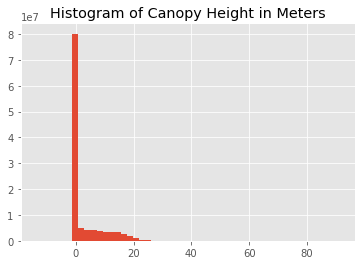

In [10]:
#plotting the Canopy Height Model as a histogram

plt.figure()
canopy_HARV.plot.hist(bins=50)
plt.title("Histogram of Canopy Height in Meters")